In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
# Membaca dataset
data = pd.read_csv('Data_Ikan.csv')

In [25]:
# Data Understanding
print("Tampilkan beberapa baris dari dataset:")
print(data.head())  # Tampilkan 5 baris pertama
print(data)         # Tampilkan seluruh dataset
print(f"Jumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")

Tampilkan beberapa baris dari dataset:
              species  length  weight  w_l_ratio
0  Anabas testudineus    8.57    2.93       0.34
1  Anabas testudineus    6.69    3.05       0.46
2  Anabas testudineus    8.35    3.08       0.37
3  Anabas testudineus    8.84    3.20       0.36
4  Anabas testudineus    7.82    3.07       0.39
                    species  length  weight  w_l_ratio
0        Anabas testudineus    8.57    2.93       0.34
1        Anabas testudineus    6.69    3.05       0.46
2        Anabas testudineus    8.35    3.08       0.37
3        Anabas testudineus    8.84    3.20       0.36
4        Anabas testudineus    7.82    3.07       0.39
...                     ...     ...     ...        ...
4075  Sillaginopsis panijus   30.21    4.73       0.16
4076  Sillaginopsis panijus   32.32    4.73       0.15
4077  Sillaginopsis panijus   33.74    4.73       0.14
4078  Sillaginopsis panijus   32.49    4.74       0.15
4079  Sillaginopsis panijus   31.78    4.74       0.15

[4080 

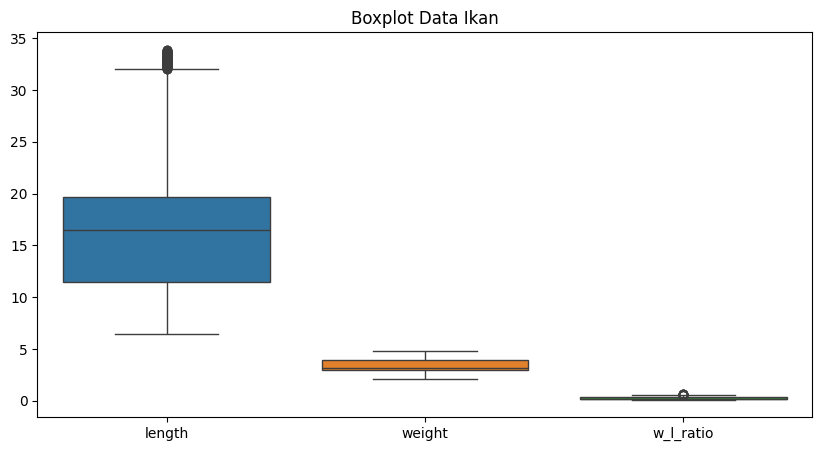

In [26]:
# Visualisasi: Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.title("Boxplot Data Ikan")
plt.show()

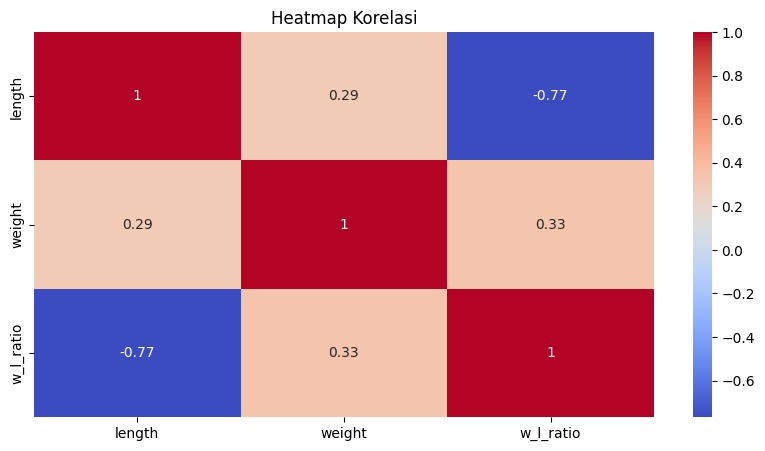

In [30]:
# Visualisasi: Heatmap hanya untuk kolom numerik
plt.figure(figsize=(10, 5))

# Menghitung korelasi hanya untuk kolom numerik
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

<Figure size 1000x500 with 0 Axes>

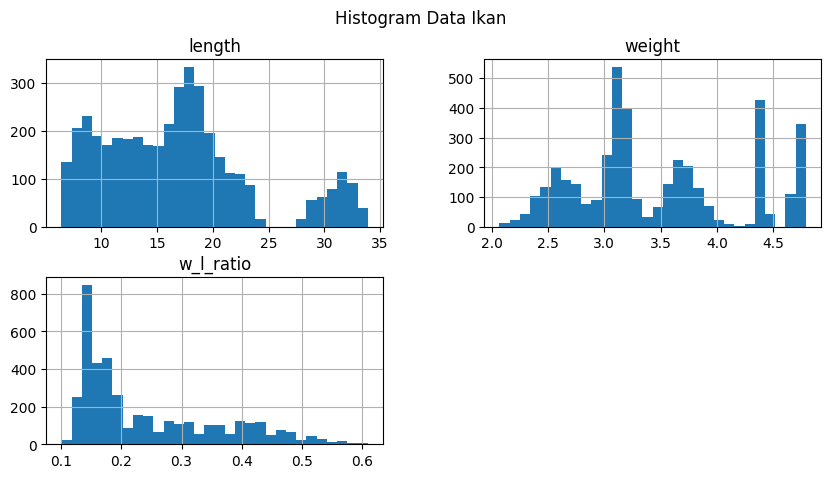

In [31]:
# Visualisasi: Histogram
plt.figure(figsize=(10, 5))
data.hist(bins=30, figsize=(10, 5))
plt.suptitle("Histogram Data Ikan")
plt.show()

In [32]:
# Data Preparation
print("Informasi dataset:")
print(data.info())

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None


In [34]:
print("Statistik Deskriptif:")
print(data.describe())

Statistik Deskriptif:
           length       weight    w_l_ratio
count  4080.00000  4080.000000  4080.000000
mean     16.69040     3.455341     0.242659
std       6.71153     0.715064     0.115420
min       6.41000     2.070000     0.100000
25%      11.44000     3.000000     0.150000
50%      16.48000     3.200000     0.190000
75%      19.68000     3.890000     0.320000
max      33.89000     4.790000     0.610000


In [35]:
# Feature Scaling
X = data[['length', 'w_l_ratio']]  # Gunakan fitur lain sebagai input
y = data['weight']  # Kolom target yang ingin diprediksi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Prediction and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {mse}")

Model Mean Squared Error: 0.09024721853377708


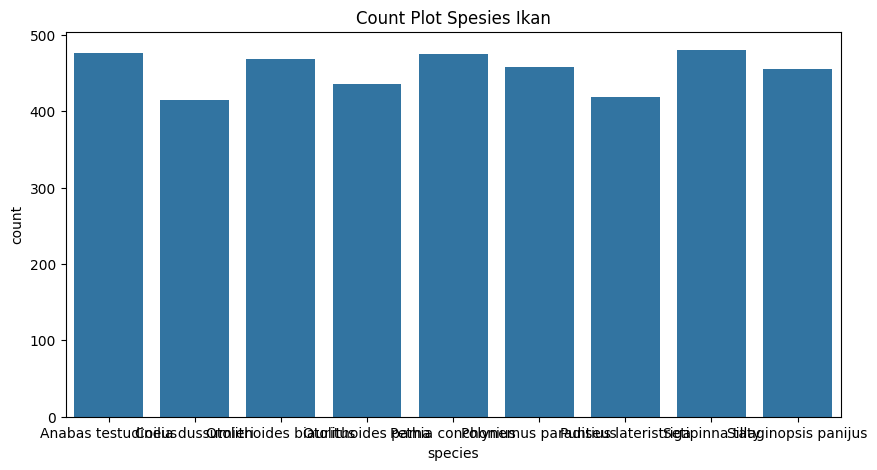

In [38]:
# Visualisasi Data Preparation (contoh)
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='species')  # Contoh visualisasi berdasarkan kolom 'species'
plt.title("Count Plot Spesies Ikan")
plt.show()